In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from math import sqrt
from scipy.stats import skew
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [36]:
# load data
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

In [37]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Exploratory EDA

In [38]:
train.shape

(1460, 80)

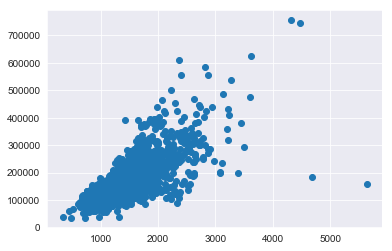

In [39]:
plt.figure(figsize=)
plt.scatter(train['GrLivArea'], train['SalePrice'])

In [40]:
# drop outliers
print(train[train['GrLivArea'] >= 4000])

outliers = train[(train['GrLivArea'] >= 4000) & (train['SalePrice'] < 210000)].index

train.drop(outliers, inplace=True)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
524           60       RL        130.0    40094   Pave   NaN      IR1   
692           60       RL        104.0    21535   Pave   NaN      IR1   
1183          60       RL        160.0    15623   Pave   NaN      IR1   
1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig    ...     PoolArea PoolQC  Fence  \
Id                                      ...                              
524          Bnk    AllPub    Inside    ...            0    NaN    NaN   
692          Lvl    AllPub    Corner    ...            0    NaN    NaN   
1183         Lvl    AllPub    Corner    ...          555     Ex  MnPrv   
1299         Bnk    AllPub    Corner    ...          480     Gd    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                    

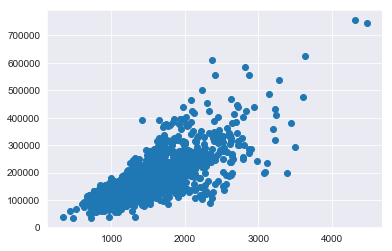

In [41]:
plt.scatter(train['GrLivArea'], train['SalePrice'])

In [12]:
# missing data
missing = train.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

PoolQC          1451
MiscFeature     1402
Alley           1365
Fence           1176
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [13]:
#For most columns (as seen from the documentation), NA means that the  house does not have that feature
#We can replace NA with the word 'No', to indicate the feature doesn't exist for this house
#Define function to do this for multiple column names

def ConvertNaToNone(df, varlist):
    amescopy = df.copy()
    for var in varlist:
        series = train[var]
        series[series.isna()] = 'None'
        amescopy[var] = series
    return amescopy

In [14]:
ames = ConvertNaToNone(train, ['PoolQC', 'MiscFeature','Alley', 'Fence', 'FireplaceQu', 
                                      'GarageYrBlt', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 
                                      'GarageType', 'GarageFinish', 'GarageQual', 'BsmtCond', 'BsmtQual', 
                                      'BsmtFinType1', 'MasVnrType'])

In [15]:
null = ames.isnull().sum()
null[null > 0].sort_values(ascending=False)

LotFrontage    259
MasVnrArea       8
Electrical       1
dtype: int64

In [16]:
#For the one missing 'Electrical' entry, replace with the most common category
print(ames['Electrical'].value_counts())
ames.loc[ames['Electrical'].isna(),'Electrical'] = 'SBrkr'
print(ames['Electrical'].value_counts())

SBrkr    1330
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
SBrkr    1331
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [17]:
#For the two numerical entries (LotFrontage, MasVnrArea), replace with random sample of the non-NA values
np.random.seed(0)

ames.loc[ames['LotFrontage'].isna(), 'LotFrontage'] = np.random.choice(ames['LotFrontage'].dropna(), size=259, replace=True)
ames.loc[ames['MasVnrArea'].isna(), 'MasVnrArea'] = np.random.choice(ames['MasVnrArea'].dropna(), size=8, replace=True)

In [14]:
PureCategorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
                  'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'MasVnrType', 'Heating', 'CentralAir', 'Electrical',
                  'GarageType', 'SaleType','SaleCondition']
QuesCategorical = ['LotShape', 'Utilities']
OrdCategorical = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                 'PavedDrive', 'PoolQC','Fence']
JointFeatures = ['Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd']
Numerical = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtScore', 'TotalBsmtSF', 'TotalSF',
            'PctLowQual', 'AboveGroundPct', 'TotalBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
            'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
            'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
len(PureCategorical) + len(QuesCategorical) + len(OrdCategorical) + len(JointFeatures) + len(Numerical)

71

In [18]:
#Fix index 333, BsmtFinType2 to 'Unf' as it should be
ames.loc[333,'BsmtFinType2']='Unf'

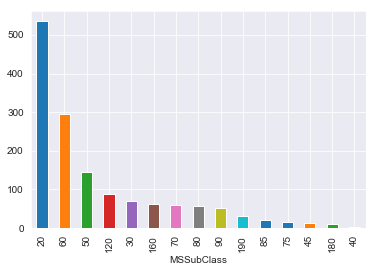

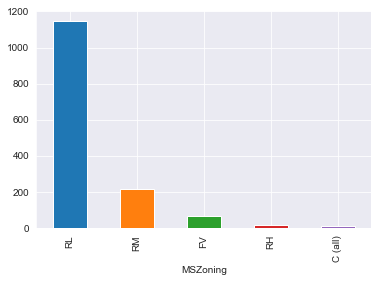

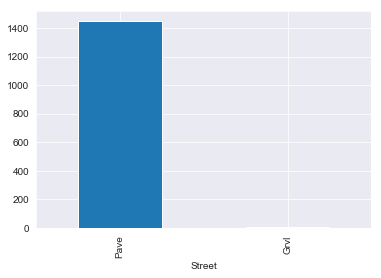

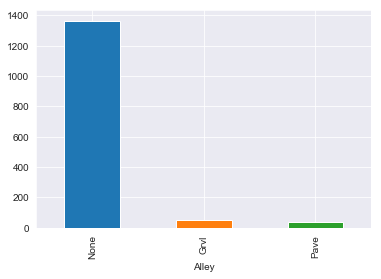

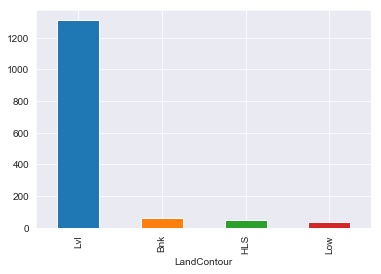

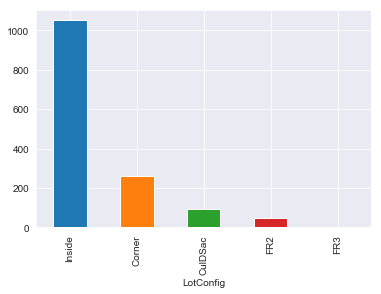

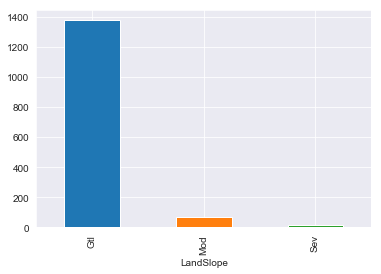

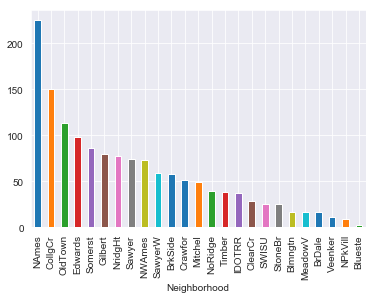

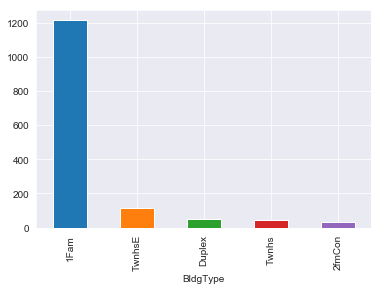

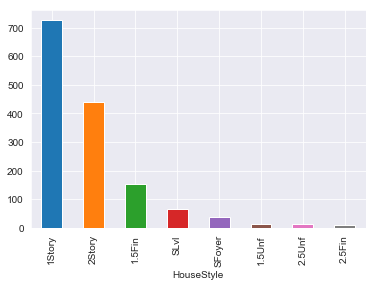

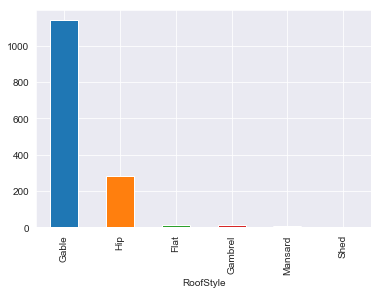

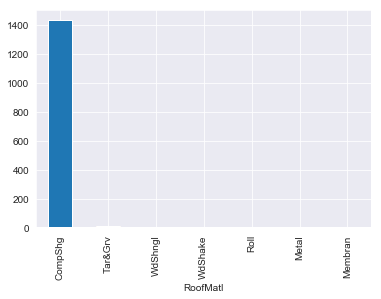

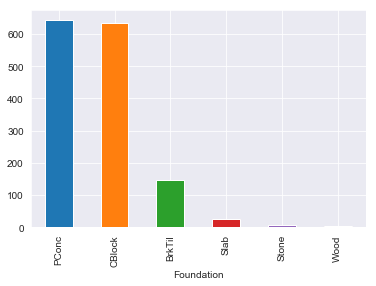

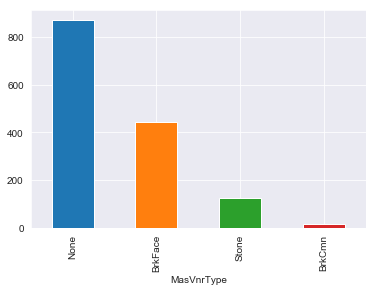

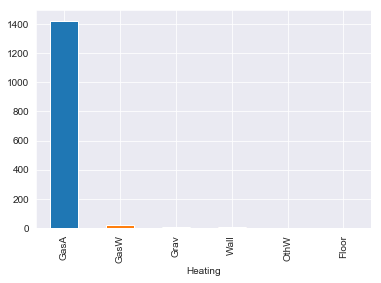

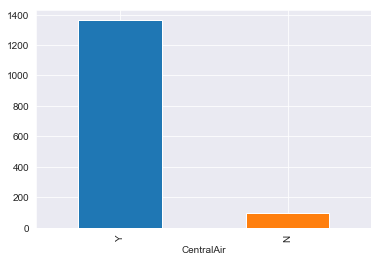

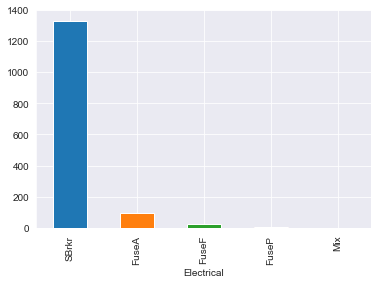

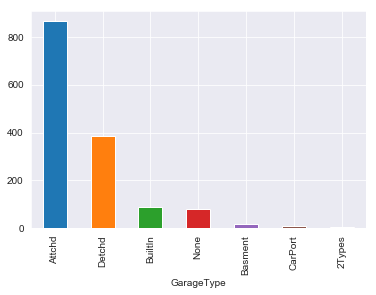

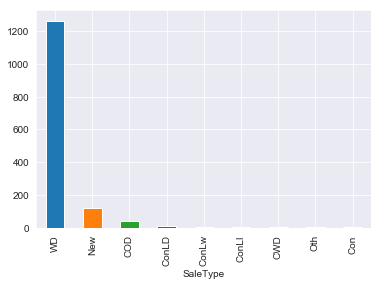

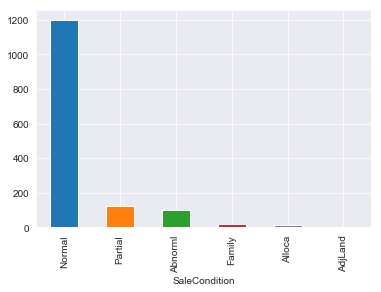

In [16]:
#Visualize Categorical Data
for feature in PureCategorical:
    class_count = ames.groupby(feature).size().sort_values(ascending=False).plot(kind='bar')
    plt.show()

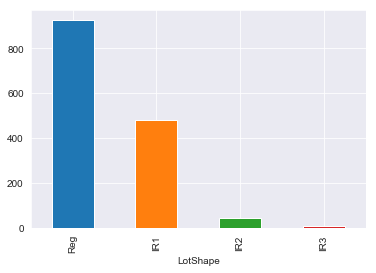

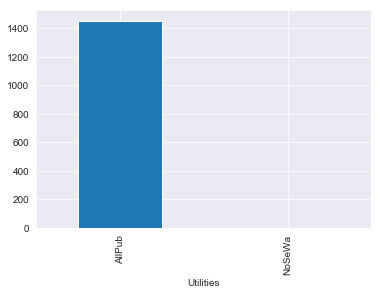

In [17]:
for feature in QuesCategorical:
    class_count = ames.groupby(feature).size().sort_values(ascending=False).plot(kind='bar')
    plt.show()

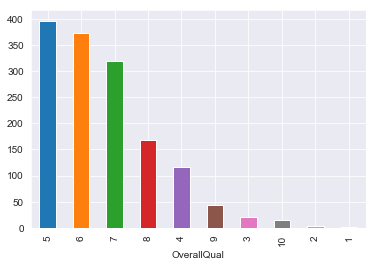

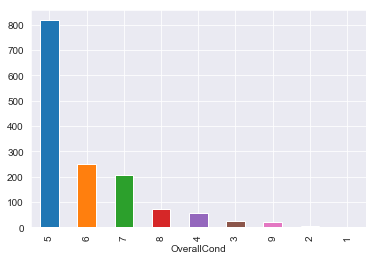

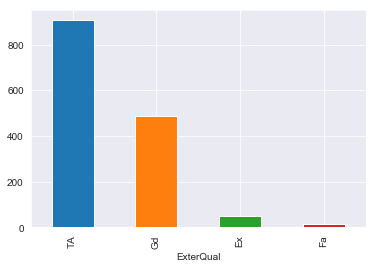

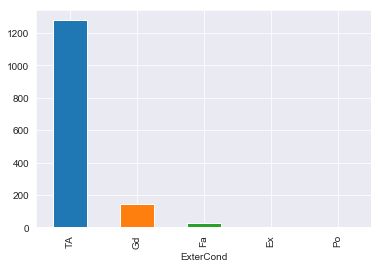

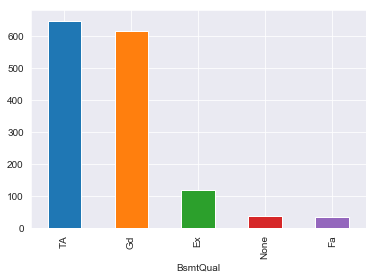

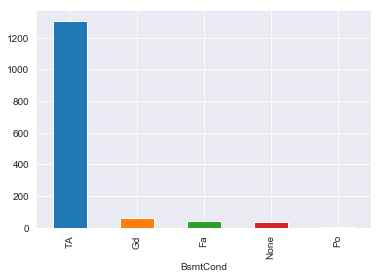

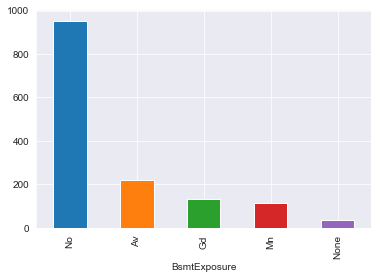

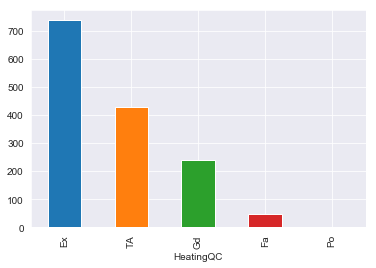

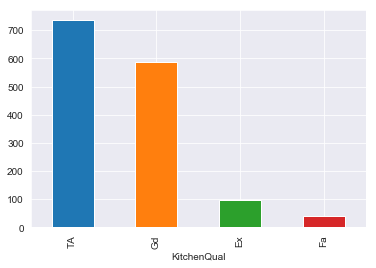

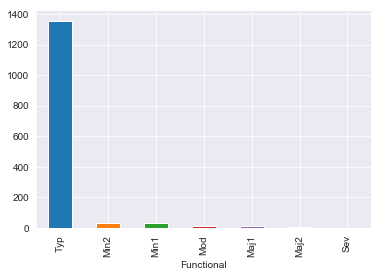

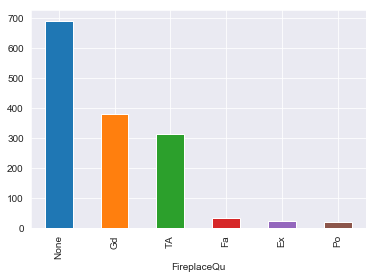

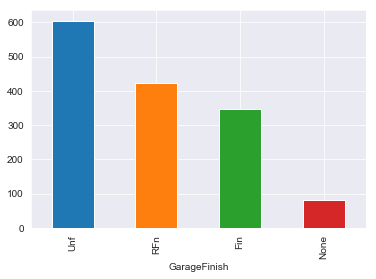

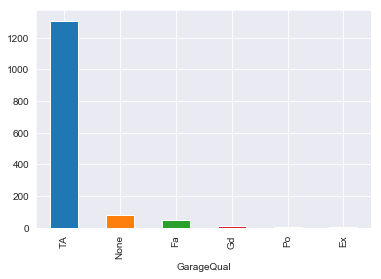

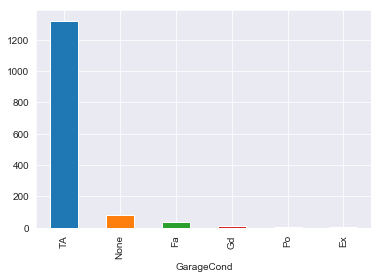

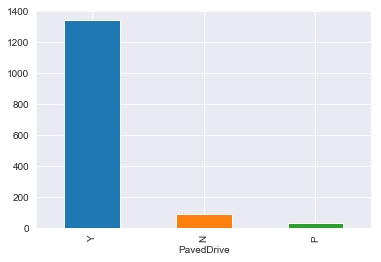

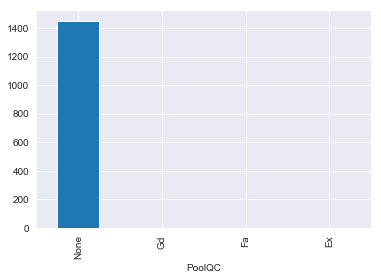

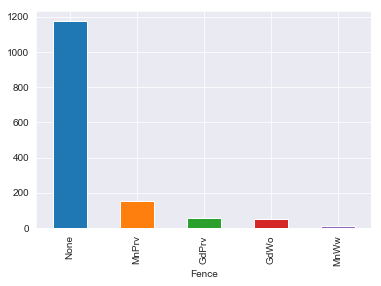

In [18]:
for feature in OrdCategorical:
    class_count = ames.groupby(feature).size().sort_values(ascending=False).plot(kind='bar')
    plt.show()    

most features are not normally distributed.

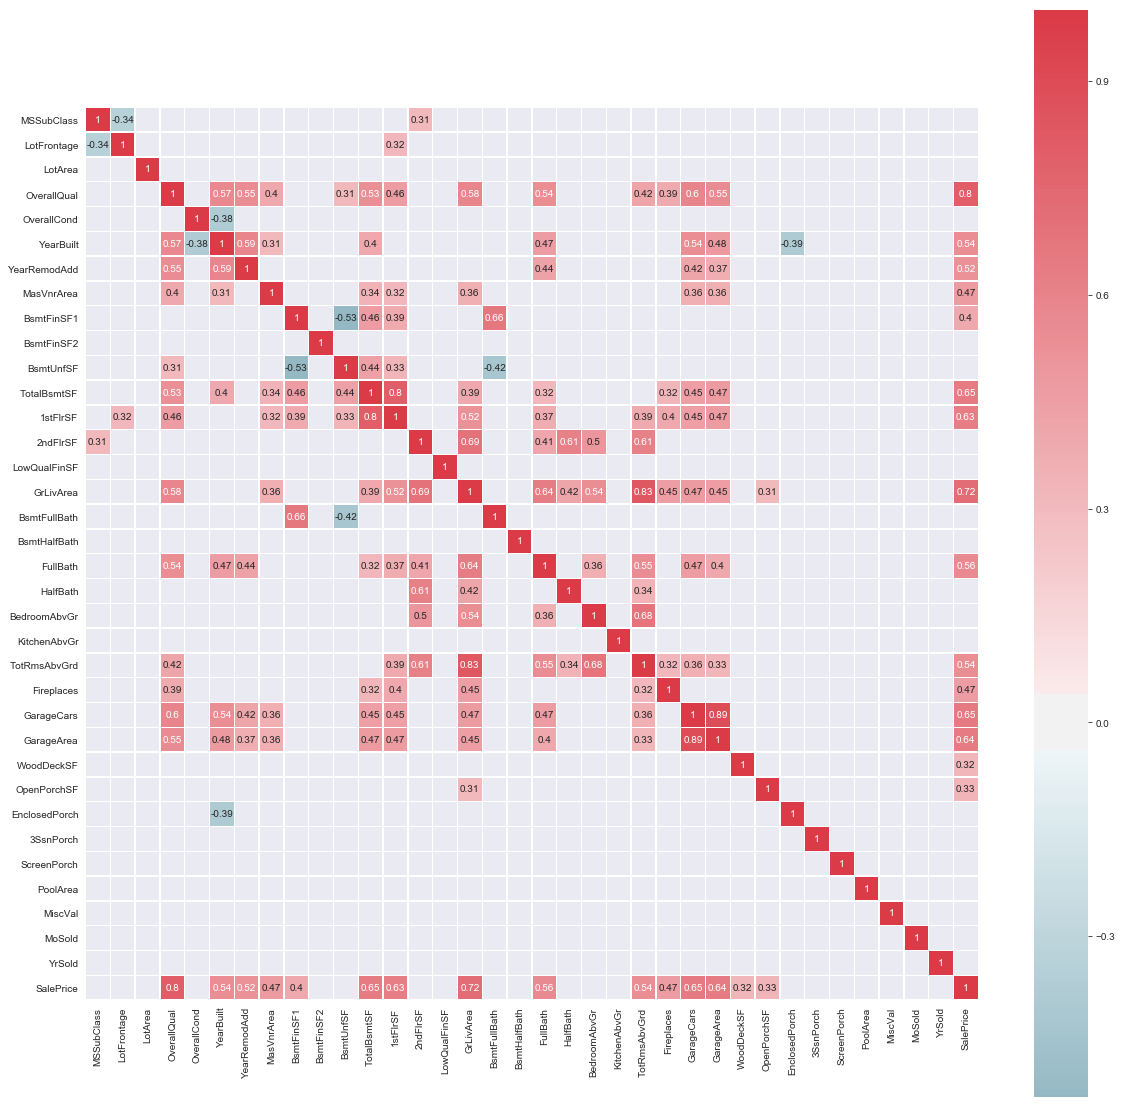

In [19]:
correlation = ames.corr(method='pearson')
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation[(correlation > 0.3)| (correlation < -0.3)], cmap=cmap,
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values, 
            center=0, annot=True,
            square=True, linewidths=.5, annot_kws={"size": 10})

# sns.heatmap(, cbar_kws={"shrink": .5},
#             center=0, square=True,
#             annot=True, linewidths=.5, annot_kws={"size": 8})

In [20]:
# check for skewness of data
skew_ = pd.DataFrame(ames.skew(), columns=["skew"])
skew_[(skew_>1) | (skew_<-1)].dropna()

,skew
MSSubClass,1.406366
LotFrontage,1.449003
LotArea,12.587561
MasVnrArea,2.643480
BsmtFinSF2,4.248587
LowQualFinSF,8.998564
BsmtHalfBath,4.128967
KitchenAbvGr,4.481366
WoodDeckSF,1.551271
OpenPorchSF,2.339846


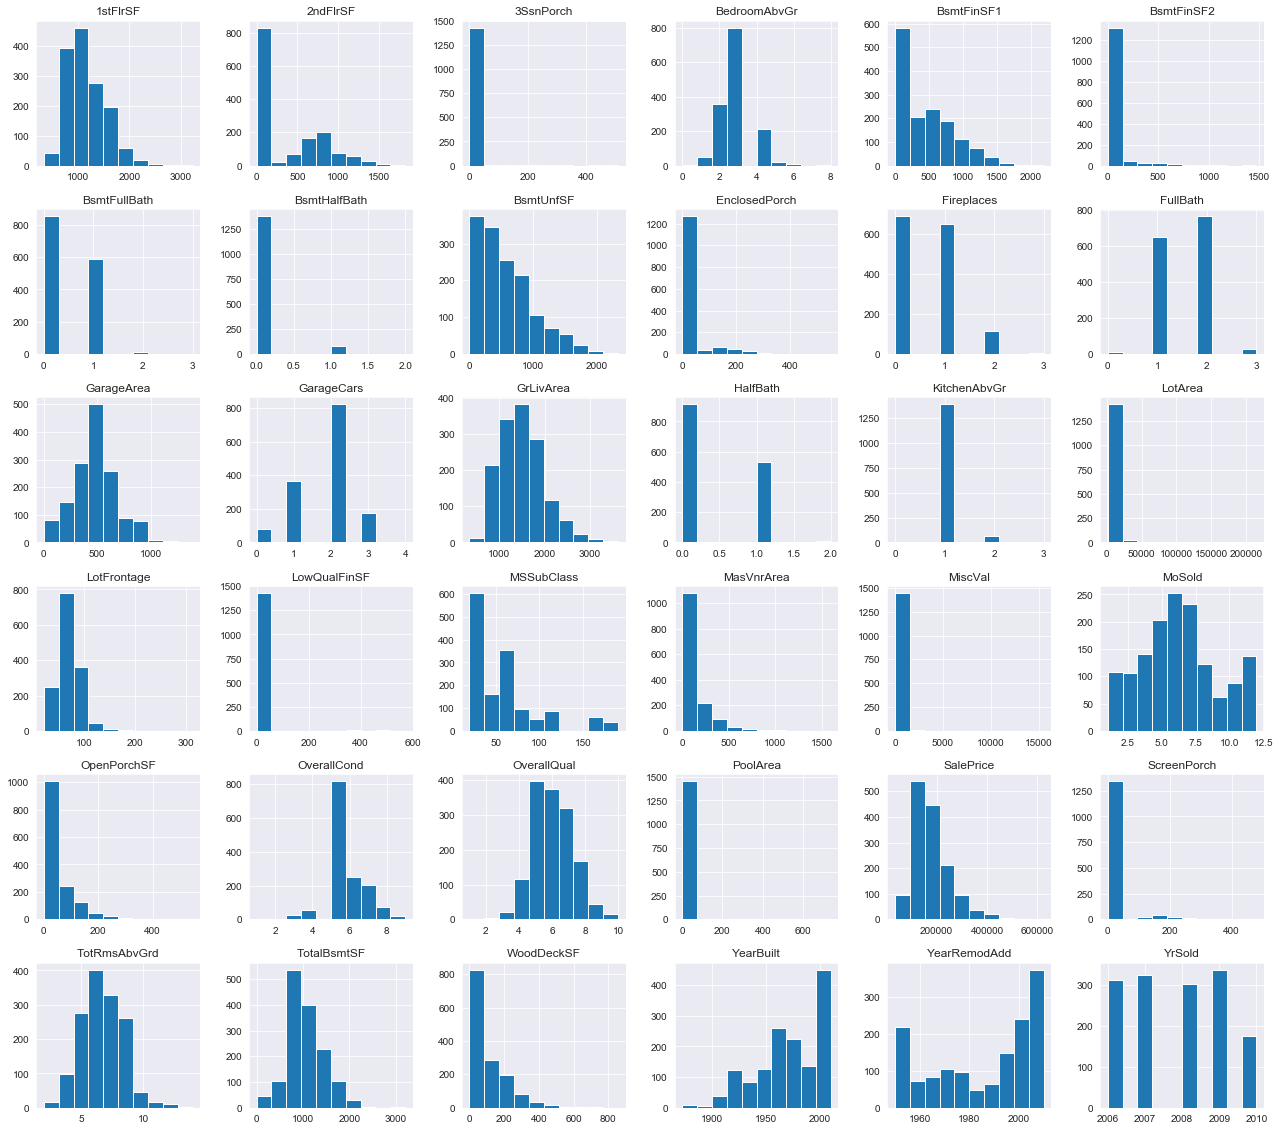

In [21]:
# histogram overview of data
overview = ames.hist(figsize=(22,20))

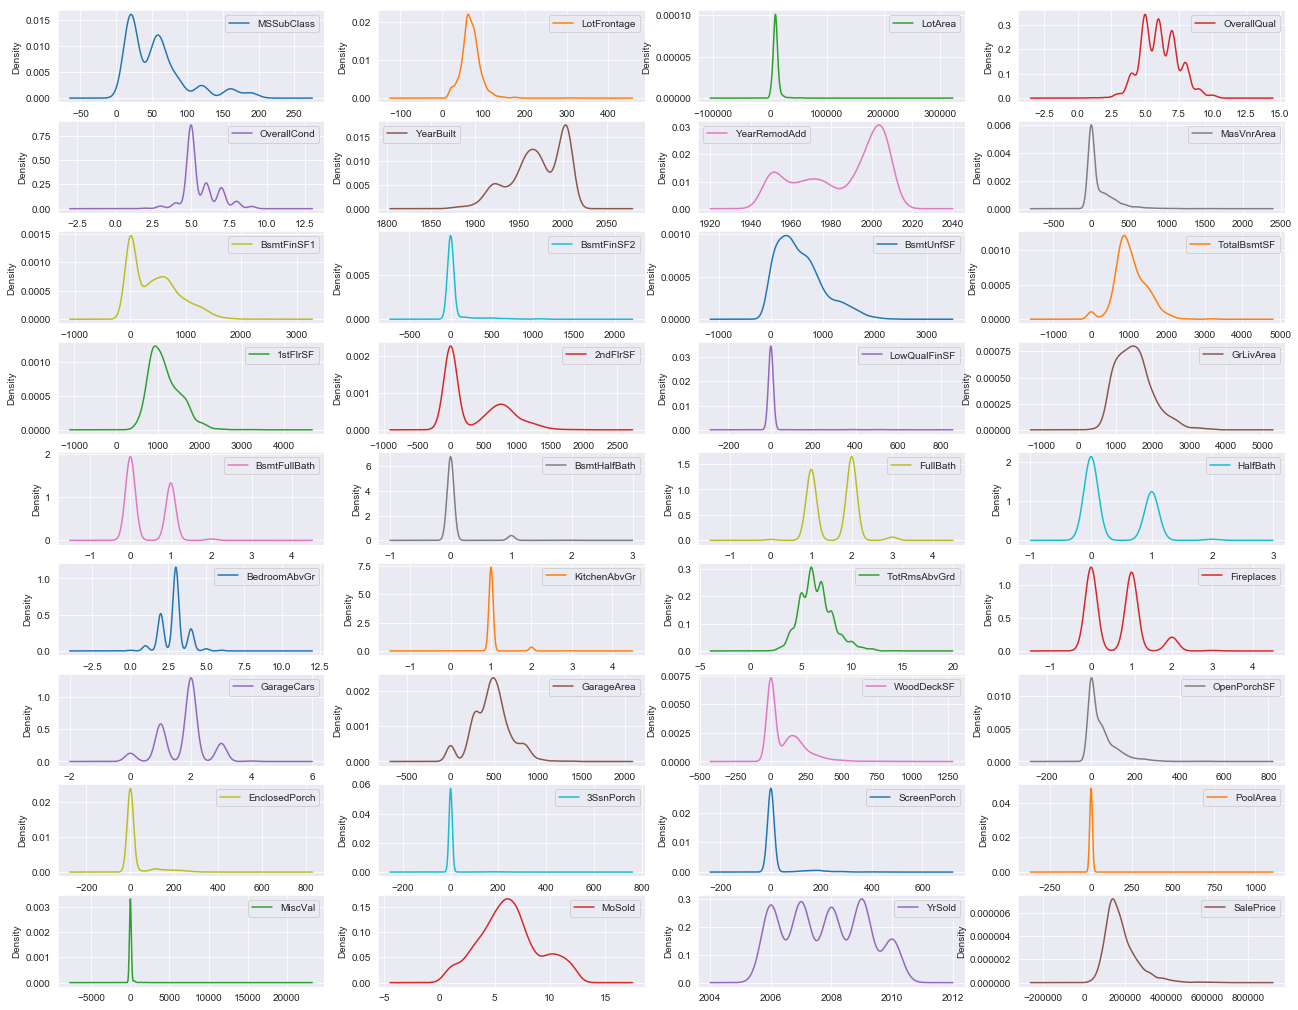

In [22]:
# density overview
density = ames.plot(kind='density', subplots=True, layout=(10, 4), sharex=False, figsize=(22,20))

In [1]:
# # scatter overview of data
# feature = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtScore', 'TotalBsmtSF', 'TotalSF',
#             'PctLowQual', 'AboveGroundPct', 'TotalBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
#             'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
#             'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
# # density overview
# scatter = ames.plot(x = feature,  y ='SalePrice', kind='scatter', subplots=True, layout=(10, 4), sharey=True, figsize=(22,20))

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from math import sqrt
from scipy.stats import skew
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
ames = pd.read_csv('../data/AmesDummiesOrdinal.csv', index_col=0)

In [6]:
ames.head()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,...,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold_Autumn,MoSold_Spring,MoSold_Winter
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,856,0,3,1,8,0,2,...,1,3,4,4,3,1,1,0,0,1
2,80.0,9600,0.0,1262,0,3,1,6,1,2,...,4,3,4,4,3,1,1,0,1,0
3,68.0,11250,162.0,920,0,3,1,6,1,2,...,4,3,4,4,3,1,1,1,0,0
4,60.0,9550,0.0,756,0,3,1,7,1,3,...,5,2,4,4,3,1,1,0,0,1
5,84.0,14260,350.0,1145,0,4,1,9,1,3,...,4,3,4,4,3,1,1,0,0,1


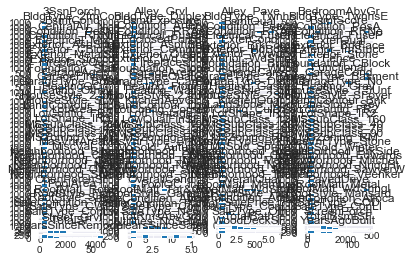

In [22]:
# histogram overview of data
overview = ames.hist(layout=(47,4))

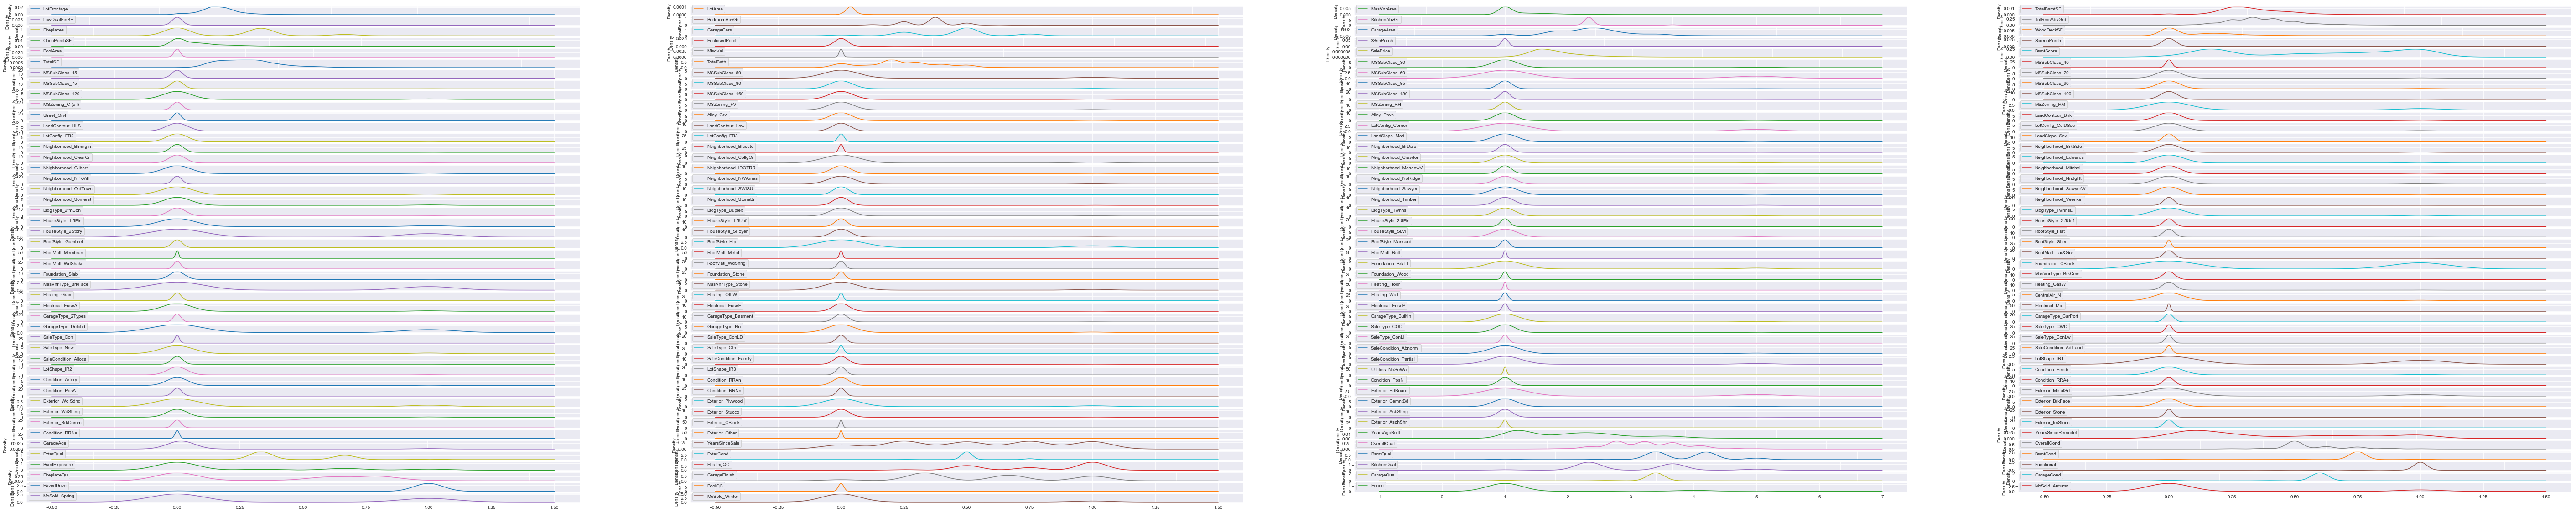

In [23]:
# density overview
density = ames.plot(kind='density', subplots=True, sharey=False, sharex=False, layout = (47,4), figsize=(100,20))